In [70]:
# model 套件
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PowerTransformer
import math
import warnings
warnings.filterwarnings('ignore')


# Second Preprocessing

In [71]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [72]:
# 處理 data 套件
import numpy as np
import pandas as pd

In [73]:
# let column can show all
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [74]:
df = pd.read_csv('Data/BayesianRidge_Pre_2/Input_A3_015.csv')
# df1 = pd.read_csv('Input_C_057.csv')
# df2 = pd.read_csv('Input_C_050.csv')

In [75]:
title = ['Input_A2_015','Input_A6_015','Input_A1_015','Input_A4_015','Input_A5_015']
# title = ['Input_A2_015','Input_A6_015','Input_A1_015','Input_A4_015','Input_A5_015']

In [76]:
# 直接執行轉換拉到最下面會發現 Wraninig
for col in title: # Predict 不做轉換
    if abs(df[col].skew()) >= 0.7: # 取偏態絕對值大於 0.5的項
        print(col)
        pt = PowerTransformer() # PowerTransformer 預設為 Yeo-Johson 轉換可轉正負數，不同於另一種 Box-Cox 只能用於正數
        d = pt.fit_transform(df[col].values.reshape(-1, 1)).flatten()
        df[col]=d

In [77]:
X = df[title]
scaler = RobustScaler()
df[title] = scaler.fit_transform(X)
y = df['Predict']

In [78]:
def pMSE(ans,predict):
    pmse = math.sqrt(sum(pow((ans - predict)/ans*100,2)/len(ans)))
    return pmse

In [79]:
def pNumber(ans,predict,num):
    return sum(abs((ans-predict)/ans*100) < num)

# Split data

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# LassoCV

In [81]:
lasso = LassoCV(alphas=[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 30],random_state = 42)
lasso.fit(X_train,y_train)
alpha = lasso.alpha_
print("first best alpha:", alpha)
lasso = LassoCV(alphas=[0.00004, 0.00008, 0.0001, 0.0003, 0.0006],random_state = 42)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("second best alpha:", alpha)
lasso = LassoCV(alphas=[0.0001 + i/100000 for i in range(1, 20)], random_state = 42)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("final best alpha:", alpha)

first best alpha: 1e-05
second best alpha: 4e-05
final best alpha: 0.00011


In [82]:
y_pred = lasso.predict(X_test)

In [83]:
# 預測值與實際值的差距，使用 r2_score ([0,1] 越大越好 )
print("R2 score: %.4f"
      % r2_score(y_test, y_pred))

R2 score: 0.5838


In [84]:
print("Percentage mse score: %.2f"
      % pMSE(y_test, y_pred))

Percentage mse score: inf


In [85]:
print("Number lower than error: %d"
      % pNumber(y_test, y_pred, 15))

Number lower than error: 8


In [86]:
# 預測值與實際值的差距，使用 RMSE
print("Root mean squared error: %.6f"
      % math.sqrt(mean_squared_error(y_test, y_pred)))

Root mean squared error: 0.020796


In [87]:
p = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
abs((y_test - y_pred)/y_test*100).describe(percentiles = p)

count    104.000000
mean            inf
std             NaN
min        0.089577
10%       21.075036
20%       33.778551
30%       33.778551
40%       34.680130
50%       39.400523
60%       64.866395
70%       94.859328
80%      118.849118
90%      175.367654
max             inf
Name: Predict, dtype: float64

In [88]:
lasso.coef_

array([0.38217709, 0.20727281, 0.04465473, 0.        , 0.        ])

# Linear regresssion

In [89]:
# 建立一個線性回歸模型
regr = LinearRegression()

# 將訓練資料丟進去模型訓練
regr.fit(X_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(X_test)

In [90]:
# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.6f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 0.000375


In [91]:
# 預測值與實際值的差距，使用 RMSE
print("Root mean squared error: %.6f"
      % math.sqrt(mean_squared_error(y_test, y_pred)))

Root mean squared error: 0.019362


In [92]:
# 預測值與實際值的差距，使用 r2_score ([0,1] 越大越好 )
print("R2 score: %.4f"
      % r2_score(y_test, y_pred))

R2 score: 0.6392


In [93]:
print("Percentage mse score: %.2f"
      % pMSE(y_test, y_pred))

Percentage mse score: inf


In [94]:
# y_test : len 103
print("Number lower than error: %d"   
      % pNumber(y_test, y_pred, 15))

Number lower than error: 12


In [95]:
p = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
abs((y_test - y_pred)/y_test*100).describe(percentiles = p)

count    104.000000
mean            inf
std             NaN
min        1.226060
10%       12.914183
20%       16.255030
30%       16.255030
40%       17.204299
50%       35.137909
60%       57.701257
70%       95.940228
80%      129.875379
90%      195.503694
max             inf
Name: Predict, dtype: float64

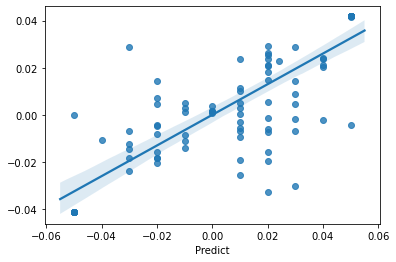

In [96]:
from matplotlib import pyplot as plt
import seaborn as sb
%matplotlib inline
sb.regplot(y_test, y_pred)

In [97]:
# p-value: Used to interpret the test, in this case whether the sample was drawn from a Gaussian distribution.
# If p-value <= alpha (0.05) : Reject H0 => need Normally distributed
# If p-value > alpha (0.05) : Accept H0 
from statsmodels.stats.diagnostic import normal_ad
normal_ad(y_test - y_pred)

(1.7923115641975187, 0.00012923401109619183)

# XGBoost regression

In [98]:
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score,KFold
from scipy.stats import skew


# 先調 booster / n_estimators

In [99]:
#for tuning parameters
parameters_for_testing = {
    'booster':['gbtree','gblinear','dart'],
    'n_estimators':range(10,201,10),
}

other_params = {'learning_rate': 0.1, 'n_estimators': 90, 'max_depth': 5, 'min_child_weight': 1, 'seed': 42,
'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}

xgb_model = XGBRegressor(**other_params)
gsearch = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train, y_train)

#print (gsearch1.cv_results_)
print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    3.1s
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:    3.1s
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:    3.2s
[Parallel(n_jobs=6)]: Batch computation too fast (0.1920s.) Setting batch_size=2.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    3.2s
[Parallel(n_jobs=6)]: Done  39 tasks      | elapsed:    3.3s
[Parallel(n_jobs=6)]: Batch computation too fast (0.1164s.) Setting batch_size=6.
[Parallel(n_jobs=6)]: Batch computation too fast (0.1257s.) Setting batch_size=18.
[Parallel(n_jobs=6)]: Done  69 tasks      | elapsed:    3.5s


best params
{'booster': 'gbtree', 'n_estimators': 50}
best score
0.4671498501582129


[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    5.3s finished


# 調 max_depth / min_child_weight

In [100]:
#for tuning parameters
parameters_for_testing = {
    'max_depth': [1,2,3, 4, 5, 6, 7, 8, 9, 10], 
    'min_child_weight': [1, 2, 3, 4, 5, 6]
}

other_params = {'booster':'gbtree','learning_rate': 0.1, 'n_estimators': 50, 'seed': 42,
'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}

xgb_model = XGBRegressor(**other_params)
gsearch = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train, y_train)

#print (gsearch1.cv_results_)
print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0249s.) Setting batch_size=16.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


best params
{'max_depth': 5, 'min_child_weight': 2}
best score
0.4964873785736243


[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    0.4s finished


# 調 gamma

In [101]:
#for tuning parameters
parameters_for_testing = {
    'gamma': [0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
}

other_params = {'booster':'gbtree','learning_rate': 0.1, 'n_estimators': 50, 'max_depth': 5, 'min_child_weight': 2, 'seed': 42,
'subsample': 0.8, 'colsample_bytree': 0.8, 'reg_alpha': 0, 'reg_lambda': 1}

xgb_model = XGBRegressor(**other_params)
gsearch = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train, y_train)

#print (gsearch1.cv_results_)
print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
best params
{'gamma': 0}
best score
0.4964873785736243


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0249s.) Setting batch_size=16.
[Parallel(n_jobs=6)]: Done   4 out of  21 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=6)]: Done   7 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  10 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  21 out of  21 | elapsed:    0.0s finished


# 調 subsample / colsample_bytree

In [102]:
#for tuning parameters
parameters_for_testing = {
    'subsample': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
}

other_params = {'booster':'gbtree','learning_rate': 0.1, 'n_estimators': 50, 'max_depth': 5, 'min_child_weight': 2, 'seed': 42,
 'reg_alpha': 0, 'reg_lambda': 1, 'gamma':0}

xgb_model = XGBRegressor(**other_params)
gsearch = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train,y_train)

#print (gsearch1.cv_results_)
print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0251s.) Setting batch_size=14.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Batch computation too fast (0.1936s.) Setting batch_size=28.


best params
{'colsample_bytree': 0.4, 'subsample': 0.5}
best score
0.5084149697654791


[Parallel(n_jobs=6)]: Done 192 out of 192 | elapsed:    0.4s finished


# reg_alpha / reg_lambda

In [103]:
#for tuning parameters
parameters_for_testing = {
    'reg_alpha': [0,0.05, 0.1, 0.5 , 1, 2, 3], 'reg_lambda': [0.05, 0.1, 0.5 , 1, 2, 3]
}

other_params = {'booster':'gbtree','learning_rate': 0.1, 'n_estimators': 50, 'max_depth': 5, 'min_child_weight': 2, 'seed': 42,
 'gamma':0,'subsample':0.5,'colsample_bytree': 0.4}

xgb_model = XGBRegressor(**other_params)
gsearch = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train, y_train)

#print (gsearch1.cv_results_)
print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 42 candidates, totalling 126 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0310s.) Setting batch_size=12.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  24 out of 126 | elapsed:    0.1s remaining:    0.7s


best params
{'reg_alpha': 0, 'reg_lambda': 1}
best score
0.5084149697654791


[Parallel(n_jobs=6)]: Done 102 out of 126 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=6)]: Done 126 out of 126 | elapsed:    0.2s finished


# learning_rate

In [104]:
#for tuning parameters
parameters_for_testing = {
   'learning_rate': [0.01, 0.05, 0.07, 0.1, 0.2]
}

other_params = {'booster':'gbtree', 'n_estimators':50, 'max_depth': 5, 'min_child_weight': 2, 'seed': 42,
 'gamma':0,'subsample':0.5,'colsample_bytree': 0.4,'reg_alpha': 0, 'reg_lambda': 1}

xgb_model = XGBRegressor(**other_params)
gsearch = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train, y_train)

#print (gsearch1.cv_results_)
print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
best params
{'learning_rate': 0.1}
best score
0.5084149697654791


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0209s.) Setting batch_size=18.
[Parallel(n_jobs=6)]: Done   4 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done   6 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done   8 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  10 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  12 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  15 out of  15 | elapsed:    0.0s finished


In [105]:
best_xgb_model = XGBRegressor(
              learning_rate = 0.1,
              booster = 'gbtree', 
              n_estimators = 50, 
              max_depth = 5, 
              min_child_weight = 2,
              seed = 42,
              gamma = 0,
              subsample = 0.5,
              colsample_bytree = 0.4,
              reg_alpha =  0,
              reg_lambda = 1)

best_xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=2, missing=nan, monotone_constraints='()',
             n_estimators=50, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=42, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [106]:
y_pred = best_xgb_model.predict(X_test)

In [107]:
# 預測值與實際值的差距，使用 r2_score ([0,1] 越大越好 )
print("R2 score: %.4f"
      % r2_score(y_test,y_pred))

R2 score: 0.6999


In [108]:
print("Percentage rmse score: %.2f"
      % pMSE(y_test,y_pred))

Percentage rmse score: inf


In [109]:
print("Number lower than error: %d"
      % pNumber(y_test, y_pred, 15))

Number lower than error: 32


In [110]:
# 預測值與實際值的差距，使用 RMSE
print("Root mean squared error: %.6f"
      % math.sqrt(mean_squared_error(y_test,y_pred)))

Root mean squared error: 0.017658


In [111]:
p = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
abs((y_test - y_pred)/y_test*100).describe(percentiles = p)

count    104.000000
mean            inf
std             NaN
min        1.486892
10%        3.181183
20%        3.181183
30%       10.974205
40%       21.468413
50%       40.060824
60%       56.802249
70%       93.680191
80%      122.572398
90%      175.398535
max             inf
Name: Predict, dtype: float64

In [112]:
# the score function displays the accuracy of the model which translates to how well the model 
# can accurately predict for a new datapoint.
print("XGBoost regression score: %.4f"
      % best_xgb_model.score(X_train,y_train))

XGBoost regression score: 0.6891


# DecisionTree

In [113]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(
            criterion ='mse', 
            random_state = 42
)

In [114]:
param_grid = {'max_depth': range(1,10,1),
              'min_samples_split': range(2,16,2)}

gsearch = GridSearchCV(estimator = clf, param_grid = param_grid, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train, y_train)

print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 63 candidates, totalling 189 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.1018s.) Setting batch_size=2.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0409s.) Setting batch_size=18.
[Parallel(n_jobs=6)]: Done  28 tasks      | elapsed:    0.1s


best params
{'max_depth': 3, 'min_samples_split': 2}
best score
0.4532609539367775


[Parallel(n_jobs=6)]: Done 189 out of 189 | elapsed:    0.2s finished


In [53]:
 param_grid = {
              "min_samples_leaf": range(1,10,1),
              "max_leaf_nodes": range(2,10,1)
              }
    
clf = DecisionTreeRegressor(
            criterion ='mse', 
            max_depth = 3,
            min_samples_split = 2,
            random_state = 42
)

gsearch = GridSearchCV(estimator = clf, param_grid = param_grid, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train, y_train)

print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0170s.) Setting batch_size=22.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


best params
{'max_leaf_nodes': 6, 'min_samples_leaf': 1}
best score
0.4575905314445712


[Parallel(n_jobs=6)]: Done 216 out of 216 | elapsed:    0.1s finished


In [54]:
clf = DecisionTreeRegressor(
            criterion ='mse', 
            max_depth = 3,
            min_samples_split = 2,
            max_leaf_nodes = 6,
            min_samples_leaf = 1,
            random_state = 42
)
# 訓練模型
clf.fit(X_train, y_train)

# 預測測試集
y_pred = clf.predict(X_test)

In [55]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [8.60611581e-01 7.14180276e-05 4.55681384e-02 0.00000000e+00
 9.37488627e-02]


In [56]:
# 預測值與實際值的差距，使用 r2_score ([0,1] 越大越好 )
print("R2 score: %.4f"
      % r2_score(y_test, y_pred))

R2 score: 0.6069


In [57]:
print("Percentage rmse score: %.2f"
      % pMSE(y_test, y_pred))

Percentage rmse score: inf


In [58]:
# 預測值與實際值的差距，使用 RMSE
print("Root mean squared error: %.6f"
      % math.sqrt(mean_squared_error(y_test, y_pred)))

Root mean squared error: 0.020211


In [59]:
p = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
abs((y_test - y_pred)/y_test*100).describe(percentiles = p)

count    104.000000
mean            inf
std             NaN
min        0.137931
10%        0.137931
20%        0.137931
30%        3.225806
40%       12.000000
50%       51.612903
60%       54.166667
70%       84.146341
80%      141.354839
90%      196.774194
max             inf
Name: Predict, dtype: float64

#  RandomForest

In [60]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(
          criterion ='mse', 
          random_state = 42
)

In [61]:
param_grid = {
              'n_estimators': range(5,51,5),
              'max_depth': range(1,10,1),
              'min_samples_split': range(2,10,1)}

gsearch = GridSearchCV(estimator = clf, param_grid = param_grid, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train, y_train)

print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0379s.) Setting batch_size=10.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  22 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Batch computation too fast (0.1776s.) Setting batch_size=22.
[Parallel(n_jobs=6)]: Done  92 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 242 tasks      | elapsed:    1.2s
[Parallel(n_jobs=6)]: Done 440 tasks      | elapsed:    2.0s
[Parallel(n_jobs=6)]: Done 682 tasks      | elapsed:    3.2s
[Parallel(n_jobs=6)]: Done 924 tasks      | elapsed:    4.3s
[Parallel(n_jobs=6)]: Done 1210 tasks      | elapsed:    5.7s
[Parallel(n_jobs=6)]: Done 1496 tasks      | elapsed:    7.1s
[Parallel(n_jobs=6)]: Done 1826 tasks      | elapsed:    8.8s


best params
{'max_depth': 6, 'min_samples_split': 6, 'n_estimators': 35}
best score
0.534492825053312


[Parallel(n_jobs=6)]: Done 2160 out of 2160 | elapsed:   10.3s finished


In [63]:
 param_grid = {
              "min_samples_leaf": range(1,10,1),
              "max_leaf_nodes": range(2,15,1)
              }
    
clf = RandomForestRegressor(
            criterion ='mse', 
            n_estimators = 35,
            max_depth = 6,
            min_samples_split = 6,
            random_state = 42
)

gsearch = GridSearchCV(estimator = clf, param_grid = param_grid, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train, y_train)

print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 117 candidates, totalling 351 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0309s.) Setting batch_size=12.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 108 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 216 tasks      | elapsed:    1.3s


best params
{'max_leaf_nodes': 14, 'min_samples_leaf': 2}
best score
0.5291139933779037


[Parallel(n_jobs=6)]: Done 351 out of 351 | elapsed:    2.1s finished


In [64]:
clf = RandomForestRegressor( 
            criterion ='mse', 
            n_estimators = 35,
            max_depth = 6,
            min_samples_split = 6,
            max_leaf_nodes = 14,
            min_samples_leaf =2,
            random_state = 42) 
#給予max_depth 可以避免過度擬和

# 訓練模型
clf.fit(X_train, y_train)

# 預測測試集
y_pred = clf.predict(X_test)

In [65]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [0.54020821 0.14602044 0.06007912 0.13802509 0.11566715]


In [66]:
# 預測值與實際值的差距，使用 r2_score ([0,1] 越大越好 )
print("R2 score: %.4f"
      % r2_score(y_test, y_pred))

R2 score: 0.6876


In [67]:
print("Percentage rmse score: %.2f"
      % pMSE(y_test, y_pred))

Percentage rmse score: inf


In [68]:
# 預測值與實際值的差距，使用 RMSE
print("Root mean squared error: %.6f"
      % math.sqrt(mean_squared_error(y_test, y_pred)))

Root mean squared error: 0.018017


In [69]:
p = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
abs((y_test - y_pred)/y_test*100).describe(percentiles = p)

count    104.000000
mean            inf
std             NaN
min        0.261964
10%        0.377892
20%        0.377892
30%        2.220480
40%       11.693412
50%       34.499616
60%       67.788362
70%       90.029265
80%      130.007070
90%      183.609029
max             inf
Name: Predict, dtype: float64

In [ ]:
# X = pd.concat([df[title], con1,con2], axis=1).to_numpy() 